# Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

### Build an Artificial Neural Network (ANN) model using the Fashion MNIST dataset available in Keras. You will create visualizations, compile the model, and evaluate its performance on both training and validation sets. Finally, use the trained model to predict on the test data

Assignment 3 - Norma Parra - c0914632

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the Fashion MNIST Dataset

In [2]:
# Load the Fashion MNIST dataset from Keras.

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print the dimensions of the dataset
# Each dataSet has 60,000 images and each image has a height of 28 pixels and a width of 28 pixels
print('Train: X = ', X_train.shape)
print('Test: X = ', X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


2. Data Preprocessing:

In [3]:
# Normalize the data. Convert the data type of the dataset to float32. Divided by 255 because pixel values range from 0 to 255 (for grayscale) or per color channel (for RGB images).
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
from re import X

# Reshape the data for Dense layer
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

3. Visualizations. Create visualizations to explore the dataset.

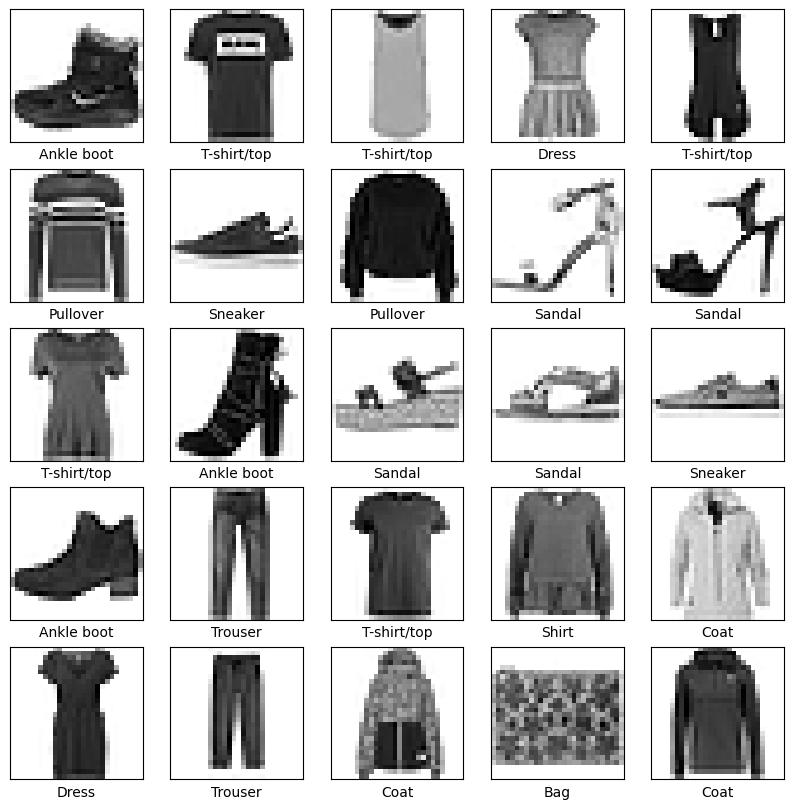

In [5]:
# Display sample images from the dataset.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape the image data before displaying it
    image = X_train[i].reshape(28, 28) # Reshape to the original image dimensions (28x28)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [6]:
# Count the number of samples in each class for train and test
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)
print("Class Counts in Train Set:", train_class_counts)
print("Class Counts in Test Set:", test_class_counts)

Class Counts in Train Set: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Class Counts in Test Set: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


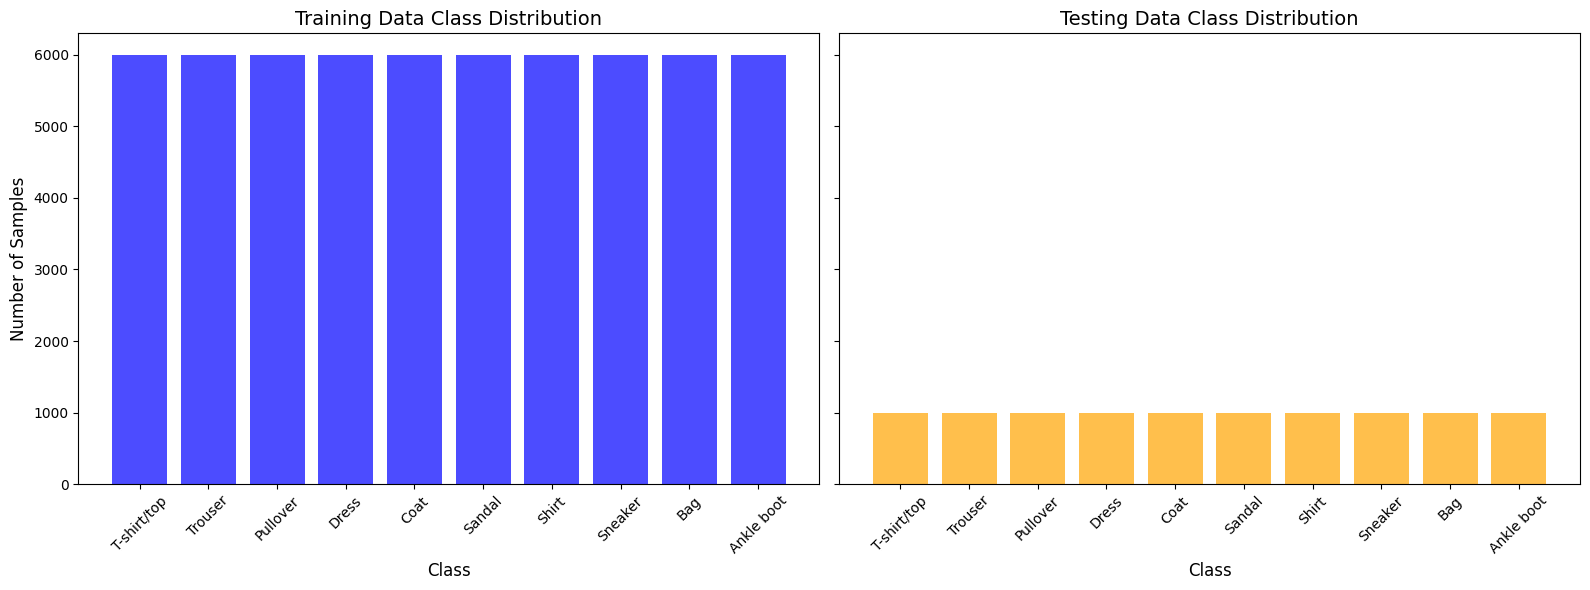

In [7]:
# Showing the distribution of samples across different classes
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train distribution
axes[0].bar(class_names, train_class_counts, color='blue', alpha=0.7)
axes[0].set_title('Training Data Class Distribution', fontsize=14)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Test distribution
axes[1].bar(class_names, test_class_counts, color='orange', alpha=0.7)
axes[1].set_title('Testing Data Class Distribution', fontsize=14)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

4. Build an Artifical Neural Network Model

In [8]:
# initialize the model
model = keras.Sequential()

# add a Flatten layer as the first layer of the model. This layer will convert the 2D image data (28, 28) into a 1D vector (784) before it's passed to the Dense layers.
# add first input layer and hidden layer
model.add(keras.layers.Flatten(input_shape=(28,28))) # Flatten the input
model.add(keras.layers.Dense(128, activation="relu"))

model.add(keras.layers.Dropout(0.3))

# add second hidden layer
model.add(keras.layers.Dense(64, activation="relu"))

model.add(keras.layers.Dropout(0.2))

# add third hidden layer
model.add(keras.layers.Dense(32, activation="relu"))

model.add(keras.layers.Dropout(0.2))

# add output layer
model.add(keras.layers.Dense(10, activation="softmax"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. Compile the Model

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

6. Train the Model

In [11]:
# early stopping of the model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [12]:
# Reshape X_train to match the expected input shape of the model
X_train = X_train.reshape(-1, 28, 28)

# Reshape X_test to match the expected input shape of the model
X_test = X_test.reshape(-1, 28, 28)

# Train the Model
history = model.fit(X_train,y_train,epochs=45,batch_size=64,validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6021 - loss: 1.1190 - val_accuracy: 0.8336 - val_loss: 0.4769
Epoch 2/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8119 - loss: 0.5408 - val_accuracy: 0.8482 - val_loss: 0.4134
Epoch 3/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8354 - loss: 0.4693 - val_accuracy: 0.8597 - val_loss: 0.3865
Epoch 4/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8455 - loss: 0.4398 - val_accuracy: 0.8662 - val_loss: 0.3804
Epoch 5/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8520 - loss: 0.4226 - val_accuracy: 0.8670 - val_loss: 0.3648
Epoch 6/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8587 - loss: 0.4054 - val_accuracy: 0.8676 - val_loss: 0.3646
Epoch 7/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8606 - loss: 0.3912 - val_accuracy: 0.8742 - val_loss: 0.3448
Epoch 8/45
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8643 - loss: 0.3856 - val_accuracy: 0

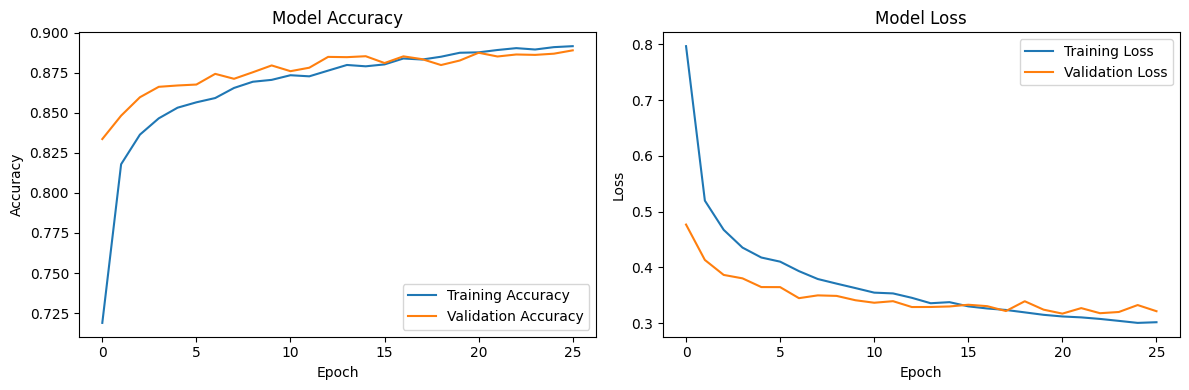

In [13]:
# Plot training history

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

7. Evaluate the Model

In [14]:
# Evaluate the model on train data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f'\nTrain accuracy: {train_accuracy:.4f}')
print(f'Train loss: {train_loss:.4f}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9098 - loss: 0.2356

Train accuracy: 0.9056
Train loss: 0.2517


In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3379

Test accuracy: 0.8788
Test loss: 0.3416


The evaluation of the model provide the results:
- Train Accuracy: 90.56%
- Train Loss: 0.26
- Test accuracy: 87.88%
- Test Loss: 0.33
The High Accuracy obtained for the test data in 88.41% indicates the model has a good performance. However, train data is slighly high than train data which indicates the model is overfitting.

8. Test Set Prediction

In [16]:
# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) # Get the class with the highest probability


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
print("classification Report",classification_report(y_test,predicted_classes,target_names=class_names))

classification Report               precision    recall  f1-score   support

 T-shirt/top       0.75      0.89      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.78      0.82      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.57      0.65      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



The classification report shows that Trouser, Sandal, Sneaker, Bag are the classes with the highest Precision score, overal the model has an accuracy of 88% for precit correclty the classes

Predicted Classes: [9 2 1 ... 8 1 5]


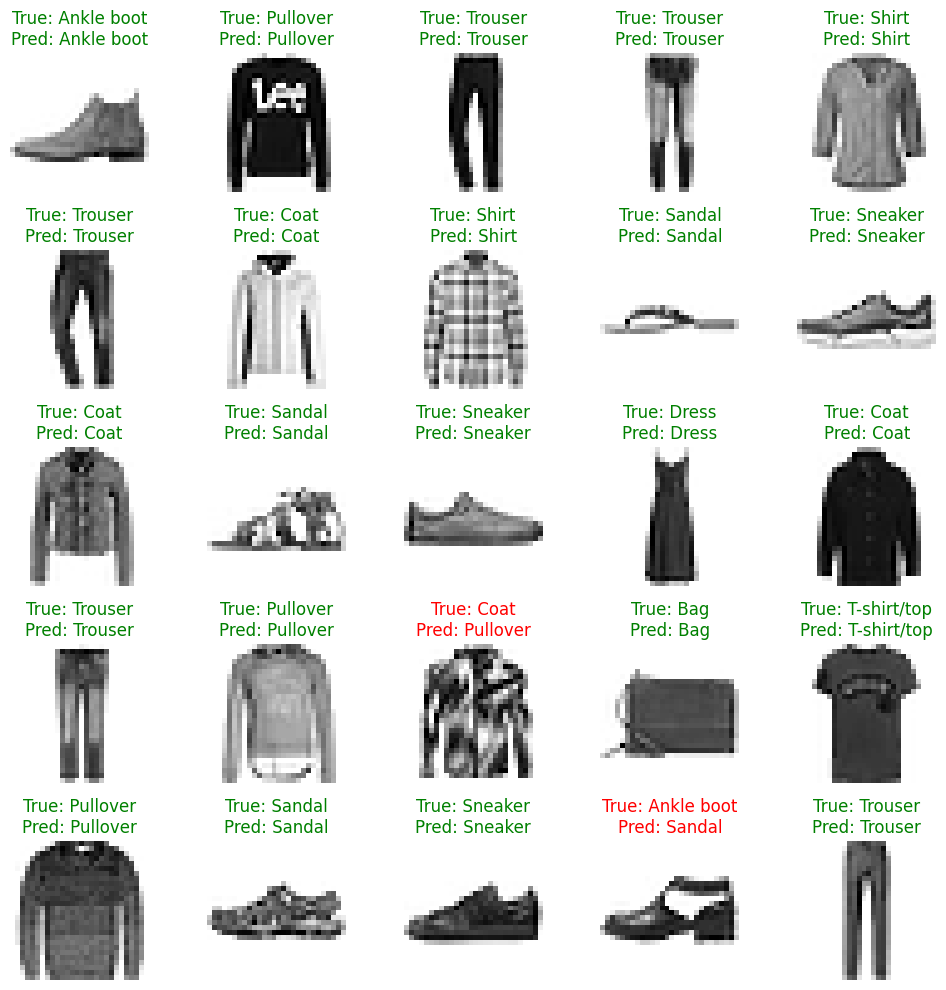

In [18]:
#display predictions
print("Predicted Classes:", predicted_classes)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape the image data before displaying it
    image = X_test[i].reshape(28, 28) # Reshape to the original image dimensions (28x28)
    plt.imshow(image, cmap=plt.cm.binary)
    color = 'green' if y_test[i] == predicted_classes[i] else 'red'
    plt.title(f'True: {class_names[y_test[i]]}\nPred: {class_names[predicted_classes[i]]}',
              color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()